<a href="https://colab.research.google.com/github/gr8318/BMLP/blob/main/CT2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
classes=['Airplane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=15,batch_size=64,
          validation_data=(x_test,y_test))
print("Test Accuracy:",model.evaluate(x_test,y_test,verbose=0)[1])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import kagglehub

path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")
print("Path to dataset files:", path)

img_height, img_width = 32, 32
batch_size = 64

train_dataset = image_dataset_from_directory(
    f"{path}/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

test_dataset = image_dataset_from_directory(
    f"{path}/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

def flatten_and_normalize(images, labels):
    images = tf.reshape(images, (tf.shape(images)[0], -1)) / 255.0
    return images, labels

train_dataset = train_dataset.map(flatten_and_normalize)
test_dataset = test_dataset.map(flatten_and_normalize)

class_names = ["cat", "dog"]
num_classes = len(class_names)
input_shape = img_height * img_width * 3

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dense(256, activation='relu'),
    Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}")

probability_model = Sequential([
    model,
    Softmax()
])

for images, labels in test_dataset.take(1):
    predictions = probability_model.predict(images)
    for i in range(5):
        print(f"Predicted: {class_names[tf.argmax(predictions[i])]}, True: {class_names[labels[i]]}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9100 - loss: 0.3035 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9888 - val_loss: 0.0360
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9870 - val_loss: 0.0526
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9913 - val_loss: 0.0324
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9888 - loss: 0.0367
Test Accuracy: 99.14%


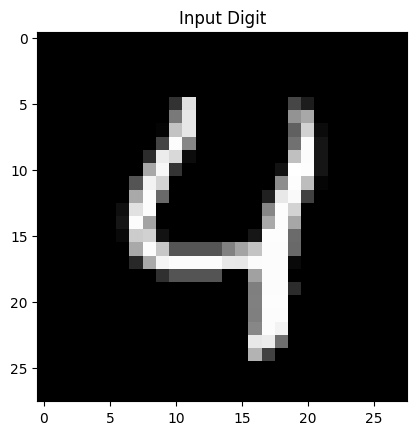

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted digit: 4


In [19]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")
import numpy as np
import matplotlib.pyplot as plt

img = x_test[4]
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Input Digit")
plt.show()

pred = model.predict(np.expand_dims(img, axis=0))
print("Predicted digit:", pred.argmax())